In [1]:
import scanpy as sc
import torch
from deepmap import DeepMap
import warnings

In [2]:
torch.cuda.set_device(1)

In [3]:
warnings.filterwarnings('ignore')

In [4]:
adata = sc.read_h5ad('../datasets/preprocessed/MouseBrain_Cell_Nuclei.h5ad')

In [5]:
adata

AnnData object with n_obs × n_vars = 554196 × 17081
    obs: 'celltype', 'batch'

In [6]:
adata.obs

,celltype,batch
P60CBRep1P1_GTTCGGAAACCA,Neuron,Cell (Drop-seq)
P60CBRep1P1_CTCGCAGGCTTC,Neuron,Cell (Drop-seq)
P60CBRep1P1_CGCATAGCCTCN,Neuron,Cell (Drop-seq)
P60CBRep1P1_AACAGCGTGCTA,Neuron,Cell (Drop-seq)
P60CBRep1P1_GCGCCGGATGCC,Neuron,Cell (Drop-seq)
...,...,...
sn156037,Astrocyte,Nuclei (SPLiT-seq)
sn156038,Neuron,Nuclei (SPLiT-seq)
sn156039,Astrocyte,Nuclei (SPLiT-seq)
sn156040,Neuron,Nuclei (SPLiT-seq)


In [7]:
batch_key = 'batch'

model = DeepMap(k = 10, mnn_only = True)
model.preprocess(adata, batch_key, gene_num = 4000)
model.integrate(n_iters = None, beta = 0.01)

Thu Jun  8 15:57:03 2023 Data normalization ...
Thu Jun  8 15:57:19 2023 Finding highly variable genes ...
Thu Jun  8 15:58:59 2023 Found 1420 highly variable genes
Thu Jun  8 15:58:59 2023 Saving unscaled data ...
Thu Jun  8 15:59:05 2023 Data Scaling ...
Thu Jun  8 15:59:14 2023 Performing PCA ...
Thu Jun  8 15:59:55 2023 Start integrating ...
Thu Jun  8 15:59:55 2023 GPU used.
Thu Jun  8 15:59:55 2023 Set n_iters = 22167
Thu Jun  8 15:59:58 2023 Finding neighbors ...
Thu Jun  8 16:01:17 2023 Initial neighbor search completed, time used: 79.0 seconds.
Thu Jun  8 16:13:22 2023 Reconstructing neighbors 1/5 ...
Thu Jun  8 16:17:27 2023 Reconstructing neighbors 2/5 ...
Thu Jun  8 16:21:27 2023 Reconstructing neighbors 3/5 ...
Thu Jun  8 16:25:47 2023 Reconstructing neighbors 4/5 ...
Thu Jun  8 16:30:03 2023 Reconstructing neighbors 5/5 ...
Thu Jun  8 16:34:17 2023 Integration finished.


In [8]:
model.integrated

View of AnnData object with n_obs × n_vars = 554196 × 20
    obs: 'celltype', 'batch'

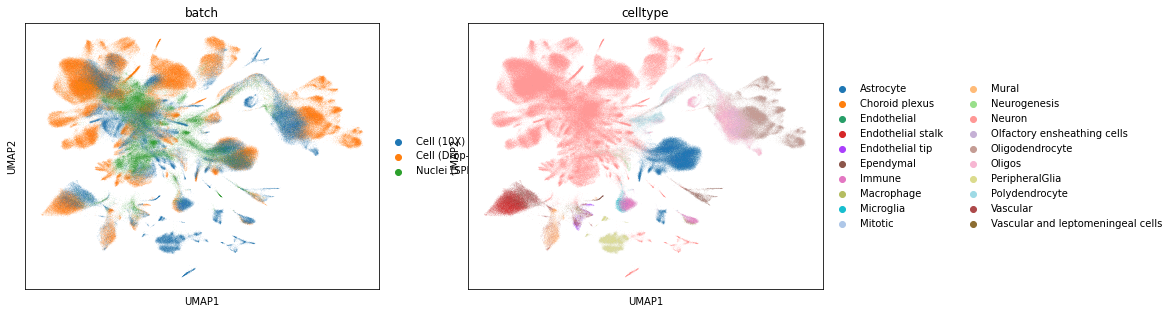

In [9]:
sc.pp.neighbors(model.integrated)
sc.tl.umap(model.integrated)
sc.pl.umap(model.integrated, color = ['batch', 'celltype'])